# kNN

一般kNN的流程;

(1) 计算已知类别数据集中的点与当前点之间的距离;\

(2) 按照距离递增次序排序;\

(3) 选取与当前点距离最小的k个点;\

(4) 确定前k个点所在类别的出现频率;\

(5) 返回前k个点出现频率最高的类别作为当前点的预测分类。\

更多距离的度量可以在https://my.oschina.net/hunglish/blog/787596 找到

In [7]:
%matplotlib inline
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [8]:
file_path = './datingTestSet.txt'
raw_data = []
labels = []
with open(file_path, 'r') as fp:
    for line in fp.readlines():
        line = line.strip()
        elems = line.split('\t')
        like = elems[3]
        label = 1 if like == 'largeDoses' else 2 if like == 'smallDoses' else 3
        raw_data.append([int(elems[0]), float(elems[1]), float(elems[2])])
        labels.append(label)
        
raw_data = np.array(raw_data)
labels = np.array(labels).reshape(-1,1)

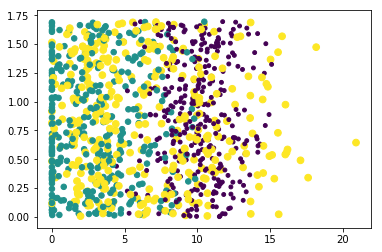

In [12]:
plt.scatter(raw_data[:,1], raw_data[:,2], 15*labels, 15*labels)